In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbolic variables
x, x_prime = sp.symbols('x x_prime')

# Constants
Q = 5  # n/cm^3 s (source strength)
P = 10  # slab limit
D = 0.7  # Diffusion coefficient
Sigma_a = 0.1  # Absorption cross-section
lambda_ = sp.sqrt(D / Sigma_a)  # Diffusion length

In [11]:
# Define the Green's function G(x, x')
# G = (1 / (2 * D)) * (sp.exp(-abs(x - x_prime) / lambda_) - sp.exp(-(x + x_prime) / lambda_)) first option, didn't work
G = (1 / lambda_) * sp.sinh(sp.Min(x, x_prime) / lambda_) * sp.exp(-sp.Max(x, x_prime) / lambda_) # second option, makes more sense
display(G)

0.377964473009227*exp(-0.377964473009227*Max(x, x_prime))*sinh(0.377964473009227*Min(x, x_prime))

In [12]:
# Define the flux phi(x) as the integral of the Green function over the source region
phi_x = sp.integrate(Q * G, (x_prime, 0, P))
display(phi_x)

-0.114154005405214*sinh(0.377964473009227*x) + 5.0*exp(-0.377964473009227*Min(10, Max(0, x)))*sinh(0.377964473009227*x) + 5.0*exp(-0.377964473009227*x)*cosh(0.377964473009227*Min(10, Max(0, x))) - 5.0*exp(-0.377964473009227*x)

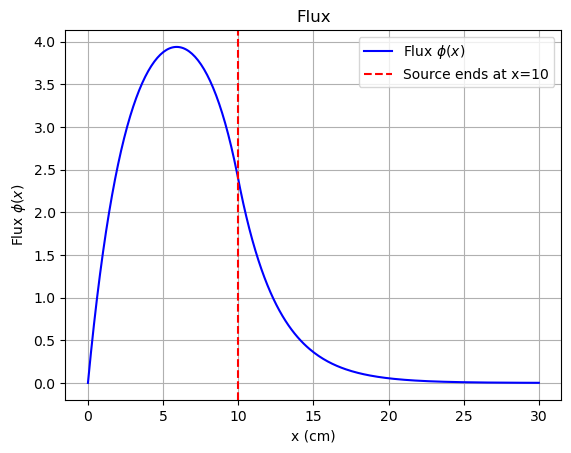

In [13]:
# Generate data for plotting
x_values = np.linspace(0, 30, 300)  # Range to plot
phi_values = [phi_x.subs(x, val).evalf() for val in x_values]

# Plotting the flux
plt.plot(x_values, phi_values, label=r'Flux $\phi(x)$', color='blue')
plt.axvline(x=P, color='red', linestyle='--', label=f'Source ends at x={P}')
plt.xlabel('x (cm)')
plt.ylabel(r'Flux $\phi(x)$')
plt.title('Flux')
plt.grid(True)
plt.legend()
plt.show()